In [236]:
import pandas as pd
import numpy as np
import time
import math
from matplotlib import pyplot as plt

In [237]:
def nan_to_zero(R):
    X = np.where(~np.isnan(R), R, 0)
    return X
def zero_to_nan(R):
    X = R.copy()
    X[X == 0] = np.nan
    return X

#### Load Train Test

In [239]:
train = np.load("../data/train.npy")
test = np.load("../data/test.npy")
M = np.load("../data/M.npy")

In [240]:
M.shape

(5, 9723)

#### KNN

In [241]:
def cosine_similarity(v1, v2):
    dot_product = 0.0
    normA = 0.0
    normB = 0.0
    for a, b in zip(v1, v2):
        dot_product += a * b
        normA += a ** 2
        normB += b ** 2
    if normA == 0.0 or normB == 0.0:
        return 0
    else:
        return dot_product / ((normA**0.5)*(normB**0.5))

In [242]:
train = nan_to_zero(train)
test = nan_to_zero(test)

In [245]:
n = train.shape[0]
m = train.shape[1]

In [246]:
def similarity(i,train,test,M):
    simi = []
    train_idx = np.nonzero(train[i,:])[0]
    test_idx = np.nonzero(test[i,:])[0]
    len_train = len(train_idx)
    if len_train <= K:
        avg = np.mean(train[i,train_idx])
        pred[i,test_idx] = avg
    else:
        for te in test_idx:
            sim = dict()
            v1 = M[:,te]
            for tr in train_idx:
                v2 = M[:,tr]
                s = cosine_similarity(v1,v2)
                sim[s] = tr
            simi.append(sim)
    return simi

In [247]:
ss = []
for i in range(n):
    print(i,"/",n)
    simi = similarity(i,train,test,M)
    ss.append(simi)

0 / 610
1 / 610
2 / 610
3 / 610
4 / 610
5 / 610
6 / 610
7 / 610
8 / 610
9 / 610
10 / 610
11 / 610
12 / 610
13 / 610
14 / 610
15 / 610
16 / 610
17 / 610
18 / 610
19 / 610
20 / 610
21 / 610
22 / 610
23 / 610
24 / 610
25 / 610
26 / 610
27 / 610
28 / 610
29 / 610
30 / 610
31 / 610
32 / 610
33 / 610
34 / 610
35 / 610
36 / 610
37 / 610
38 / 610
39 / 610
40 / 610
41 / 610
42 / 610
43 / 610
44 / 610
45 / 610
46 / 610
47 / 610
48 / 610
49 / 610
50 / 610
51 / 610
52 / 610
53 / 610
54 / 610
55 / 610
56 / 610
57 / 610
58 / 610
59 / 610
60 / 610
61 / 610
62 / 610
63 / 610
64 / 610
65 / 610
66 / 610
67 / 610
68 / 610
69 / 610
70 / 610
71 / 610
72 / 610
73 / 610
74 / 610
75 / 610
76 / 610
77 / 610
78 / 610
79 / 610
80 / 610
81 / 610
82 / 610
83 / 610
84 / 610
85 / 610
86 / 610
87 / 610
88 / 610
89 / 610
90 / 610
91 / 610
92 / 610
93 / 610
94 / 610
95 / 610
96 / 610
97 / 610
98 / 610
99 / 610
100 / 610
101 / 610
102 / 610
103 / 610
104 / 610
105 / 610
106 / 610
107 / 610
108 / 610
109 / 610
110 / 610


In [251]:
def knn(K,test,M,n,m,ss):
    pred = np.zeros((n,m))
    for i in range(n):
        simi = ss[i]
        test_idx = np.nonzero(test[i,:])[0]    
        for j in range(0,len(simi)):
            sim = simi[j]
            idx = test_idx[j]
            a = sorted(sim.keys(), reverse=True)
            a = a[:k]
            v = [sim[j] for j in a]
            pred[i,idx] = np.mean(train[i,v])  
    return pred

Find the best K

In [257]:
Ks = np.arange(5, 20, 1) 
rmse = np.zeros(len(Ks)) 

for i, k in enumerate(Ks): 
    print('K:',k)
    pred = knn(k,test,M,n,m,ss)
    temp = pred.flatten() - test.flatten()
    error = math.sqrt(sum(temp**2))
    print('RMSE = %f' % error)
    rmse[i] = error

K: 5
RMSE = 119.193456
K: 6
RMSE = 117.519029
K: 7
RMSE = 116.714810
K: 8
RMSE = 116.231299
K: 9
RMSE = 115.736517
K: 10
RMSE = 115.390229
K: 11
RMSE = 115.155025
K: 12
RMSE = 114.898325
K: 13
RMSE = 114.814837
K: 14
RMSE = 114.737333
K: 15
RMSE = 114.770912
K: 16
RMSE = 114.860705
K: 17
RMSE = 114.892435
K: 18
RMSE = 115.034956
K: 19
RMSE = 115.066173


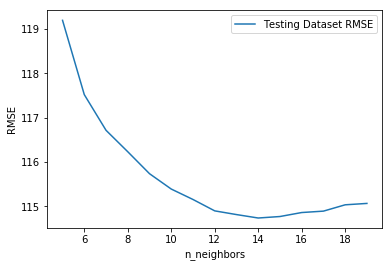

In [258]:
#Generate plot 
plt.plot(Ks, rmse, label = 'Testing Dataset RMSE') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('RMSE') 
plt.show()